#### Warm Up | Master's Thesis
# QUANTUM HEISENBERG MODEL


This is just some exercise to diagonalize a small system using `NumPy`.


The quantum Heisenberg model is a quantum mechanical extension of the Ising model used to study magnetic systems. While the Ising model has spins $σ_i ∈ \{± 1\}$ representing magnetic dipoles aligned either up or down, the Heisenberg model allows these spins to behave more realistically using quantum operators.

In the quantum Heisenberg model, spins are represented by Pauli spin-1/2 matrices acting on the tensor product space $\left(\mathbb{C}^2\right)^{\otimes N}$ of dimension $2^N$.



The Pauli matrices, denoted as $\sigma^x$, $\sigma^y$, and $\sigma^z$, are $2 \times 2$ matrices that represent the quantum spin operators in the $x$, $y$, and $z$ directions respectively. These matrices can be thought of as representing rotations of a spin in the Bloch sphere:
$$
\sigma^x = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}, \quad \sigma^y = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}, \quad \sigma^z = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}
$$

These matrices are used to define the spin interactions at each site. For a 1D system where only the neighbors are coupled with each other, the Hamiltonian is given by:

$$
\hat{H} = -\frac{1}{2} \sum_{j=1}^N \left( J_x \sigma_j^x \sigma_{j+1}^x + J_y \sigma_j^y \sigma_{j+1}^y + J_z \sigma_j^z \sigma_{j+1}^z + h \sigma_j^z \right)
$$

The Heisenberg model can be categorized based on the coupling constants:

- **XYZ Model**: $J_x \neq J_y \neq J_z$
- **XXZ Model**: $J = J_x = J_y \neq J_z$
- **XXX Model**: $J_x = J_y = J_z = J$

#### 3-SITE HEISENBERG MODEL

As a warm-up exercise, we want to diagonalize a small system of 3 spins.

For this we consider a simplified version of the Heisenberg model with $J_x = J_y = 1$ and $J_z = h = 0$. The Hamiltonian simplifies to:

$$
\hat{H} = -\frac{1}{2} \sum_{j=1}^N \left( \sigma_j^x \sigma_{j+1}^x + \sigma_j^y \sigma_{j+1}^y \right)
$$

This Hamiltonian describes an isotropic coupling in the $x$ and $y$ directions, with no coupling in the $z$ direction or external field.

We are given 3 neighboring spin sites and assume no boundary conditions and only interactions between neighboring spins:

$$
\hat{H}=-\frac{1}{2}\left(\sigma_1^x \sigma_2^x+\sigma_2^x \sigma_3^x+\sigma_1^y \sigma_2^y+\sigma_2^y \sigma_3^y\right)
$$
Each interaction term is represented as a tensor product of Pauli matrices for the spins involved and the identity matrix for the unaffected spin:

$\sigma_1^x \sigma_2^x$ becomes $\sigma^x \otimes \sigma^x \otimes \sigma^0$

$\sigma_2^x \sigma_3^x$ becomes $\sigma^0 \otimes \sigma^x \otimes \sigma^x$

We need to be very careful to respect the order of the tensor product. The order MUST align with the order when creating the state vector.

In [1]:
import numpy as np

from collections import Counter
from itertools import product

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from typing import List, Optional

def calculate_average(values: List[float], weights: Optional[List[float]] = None) -> float:
    """
    Calculate the weighted or unweighted average of a list of numbers.

    :param values: A list of numerical values.
    :param weights: A list of weights corresponding to the values. Defaults to None.
    :return: The calculated average.
    :raises ValueError: If the lengths of values and weights differ.
    """
    if weights and len(values) != len(weights):
        raise ValueError("Length of values and weights must be the same.")
    if weights:
        return sum(v * w for v, w in zip(values, weights)) / sum(weights)
    return sum(values) / len(values)


In [2]:
# constructing the Hamiltonian

sigma_0 = np.eye(2)
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

H_x_12 = np.kron(np.kron(sigma_x, sigma_x), sigma_0)
H_x_23 = np.kron(np.kron(sigma_0, sigma_x), sigma_x)
H_y_12 = np.kron(np.kron(sigma_y, sigma_y), sigma_0)
H_y_23 = np.kron(np.kron(sigma_0, sigma_y), sigma_y)

H = -0.5 * (H_x_12 + H_x_23 + H_y_12 + H_y_23)
H

array([[-0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,
        -0.+0.j],
       [-0.+0.j, -0.+0.j, -1.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,
        -0.+0.j],
       [-0.+0.j, -1.+0.j, -0.+0.j, -0.+0.j, -1.+0.j, -0.+0.j, -0.+0.j,
        -0.+0.j],
       [-0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -1.+0.j, -0.+0.j,
        -0.+0.j],
       [-0.+0.j, -0.+0.j, -1.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,
        -0.+0.j],
       [-0.+0.j, -0.+0.j, -0.+0.j, -1.+0.j, -0.+0.j, -0.+0.j, -1.+0.j,
        -0.+0.j],
       [-0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -1.+0.j, -0.+0.j,
        -0.+0.j],
       [-0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j, -0.+0.j,
        -0.+0.j]])

#### DIAGONALIZATION

```
DISCLAIMER
The following part might not be fully correct. I simply tried to google what is happening for my own understanding.
```

Over time, the system evolves dynamically toward a **Boltzmann distribution** as it interacts with its environment. This distribution describes the probability of occupying an energy eigenstate $E_i$ at thermal equilibrium and is given by:

$$
P\left(E_i\right) \propto e^{-E_i / k_B T}
$$

This distribution is often visualized as a **staircase**, where each step corresponds to an energy level:

- The **ground state** (lowest step) is the most likely to be occupied.
- Higher-energy states (higher steps) are exponentially less likely to be occupied as their energy increases.

If the system starts in a high-energy state or a random superposition of states, it exhibits a **downward trend** in energy due to the relative probabilities of occupation between states. The ratio of probabilities between two states with energies $E_1$ and $E_2$ is given by the **Boltzmann quotient**:

$$
\frac{P\left(E_2\right)}{P\left(E_1\right)}=e^{-\left(E_2-E_1\right) / k_B T}
$$

This quotient explains why:

- **Downward transitions** (from $E_2$ to $E_1$ with $E_2 > E_1$) are more likely.
- **Upward transitions** (from $E_1$ to $E_2$) are less likely, especially for larger energy gaps or lower temperatures.

At very low temperatures ($T \to 0$), the system overwhelmingly occupies the ground state, as $P(E_i) \to 0$ for all $E_i > E_{\text{ground}}$.

Now the Boltzmann Distribution tells us how we get from the raw energy values to the occupation probabilities. But actually we don't know how far each energy level is spread apart, i.e. we actually don't know how the staircase is shaped.

Here is where the Hamiltonian comes into play. The Hamiltonian encodes all the forces, interactions, and constraints in the system and dictates how a system evolves over time (via the Schrödinger equation).
By diagonalizing the Hamiltonian, you uncover the system's possible energies, from the ground state (minimum eigenvalue) to the excited states, i.e. the staircase.

The interesting thing is, when you evolve one of the eigenstates using the Schrödinger equation, you get an infinitesimal change in the global phase of the wave function. This means the frequency of the global phase is dependent on the energy of the eigenstate. This means that different energy levels correspond to different modes of the wave function in the global phase. Each of those states is defined by a configuration of spins and this specific configuration is captured by an eigenvector of the Hamiltonian.

When we apply the **Hamiltonian** $\hat{H}$ to an **eigenvector** $|\psi\rangle$, we obtain:

$$
\hat{H} |\psi\rangle = E |\psi\rangle
$$

where $E$ is the **energy** associated with that eigenvector. This operation is purely **mathematical** and reveals the energy of the state $|\psi\rangle$. Importantly, this is not a **measurement** in the quantum mechanical sense; it doesn’t involve collapsing the wave function but instead simply calculates what the energy would be if we were to measure it.

To relate this to the **ground state**: it is simply the **eigenvector** corresponding to the **lowest energy** (smallest eigenvalue).

In [3]:
# diagonalizing the Hamiltonian

eigenvalues, eigenvectors = np.linalg.eigh(H)
eigenvalues

array([-1.41421356e+00, -1.41421356e+00, -2.75795620e-17, -2.75795620e-17,
       -0.00000000e+00, -0.00000000e+00,  1.41421356e+00,  1.41421356e+00])

In [4]:
# let's say we look at the second eigenvector forth on since it is a bit more exciting than the first one

psi = eigenvectors[1]
psi

array([-0.5       +0.j,  0.        +0.j, -0.70710678-0.j,  0.        +0.j,
        0.        +0.j,  0.        +0.j, -0.5       +0.j,  0.        +0.j])

Each entry in the eigenvector corresponds to a specific configuration of spins in the computational basis. For example, the first entry corresponds to the configuration $|000\rangle$, which means all three qubits are in the state $|0\rangle$. The complex conjugate squared of the amplitude at each entry gives the probability of measuring the system in that specific configuration.
Even though we defined the Hamiltonian in terms of the Pauli matrices $\sigma^x$ and $\sigma^y$, the eigenvectors are expressed in the computational basis. The computational basis is essentially the tensor product of the eigenstates of the Pauli matrix $\sigma^z$ (which are $|0\rangle$ and $|1\rangle$) over all spins.

#### QUANTUM STATE TOMOGRAPHY

To perform **Quantum State Tomography (QST)** on the given quantum state, we want to reconstruct the **density matrix** using measurements in the **Pauli basis**. As an initial exercise we simply want to reconstruct the following pure state:

$$
|\psi\rangle =
\begin{bmatrix} 
-\frac{1}{2} \\
0 \\
-\frac{1}{\sqrt{2}} \\
0 \\
0 \\
0 \\
-\frac{1}{2} \\
0
\end{bmatrix}
$$

This state is a vector in an **8-dimensional Hilbert space**, corresponding to a **3-qubit system**. The goal of QST is to determine the state of the system by measuring **expectation values** of specific observables on multiple copies of the system.

Since we know the underlying state, we can simulate the measurement statistics using `NumPy`.

Lets attempt to measure the first qubit in $x$-direction. We begin by constructing the measurement operators corresponding to the projectors onto the $|+\rangle$ and $|-\rangle$ eigenstates of the Pauli $\sigma_x$ operator:

- **Positive eigenstate** with eigenvalue $+1$:
  $$
  |+\rangle = \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle)
  $$

- **Negative eigenstate** with eigenvalue $-1$:
  $$
  |-\rangle = \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle)
  $$

The projectors themselves can be expressed in terms of the Pauli $\sigma_x$ operator and the identity operator $\sigma_0$:

$$
P_+ = |+\rangle\langle+|=\frac{1}{2} (\sigma_0 + \sigma_x)
$$

$$
P_- = |-\rangle\langle-|= \frac{1}{2} (\sigma_0 - \sigma_x)
$$

Since the full Hilbert space is 8-dimensional, we need to expand our single-qubit projectors to act on the entire system:

$$
\begin{align*}
& P_{+}^{(0)}=P_{+} \otimes \sigma_0 \otimes \sigma_0 \\
& P_{-}^{(0)}=P_{-} \otimes \sigma_0 \otimes \sigma_0
\end{align*}
$$

The probability of obtaining a specific measurement outcome is given by the expectation value of the corresponding projector with respect to the quantum state $|\psi\rangle$:

- **Probability of measuring $|+\rangle$ on qubit 0**:
  $$
p_{+}^{(0)}=\langle\psi| P_{+}^{(0)}|\psi\rangle
  $$

- **Probability of measuring $|-\rangle$ on qubit 0**:
  $$
p_{-}^{(0)}=\langle\psi| P_{-}^{(0)}|\psi\rangle
  $$

With the probabilities calculated, we can simulate measurements to observe how the quantum state behaves under measurement in the $x$-direction.

In [8]:
# calculating said probabilities on psi

sigma_plus = 0.5 * (sigma_0 + sigma_x)
sigma_minus = 0.5 * (sigma_0 - sigma_x)

meas_plus = np.kron(sigma_plus, np.kron(sigma_0, sigma_0))
meas_minus = np.kron(sigma_minus, np.kron(sigma_0, sigma_0))

prob_plus = np.real(np.vdot(psi, meas_plus @ psi))
prob_minus = np.real(np.vdot(psi, meas_minus @ psi))

print(f"Probability of measuring |+⟩ in x-direction on qubit 0: {prob_plus:.3f}")
print(f"Probability of measuring |−⟩ in x-direction on qubit 0: {prob_minus:.3f}")
print(f"Sum of probabilities: {prob_plus + prob_minus:.3f}")

Probability of measuring |+⟩ in x-direction on qubit 0: 0.854
Probability of measuring |−⟩ in x-direction on qubit 0: 0.146
Sum of probabilities: 1.000


In [9]:
# using probabilities to generate counts

samples = 1000
measurements_qubit0 = np.random.choice(['+', '-'], size=samples, p=[prob_plus, prob_minus])

counts_qubit0 = Counter(measurements_qubit0)
print(f"Measurement results for qubit 0 in x basis ({samples} trials): \nstate |+⟩: {counts_qubit0['+']}, state |-⟩: {counts_qubit0['-']}")

Measurement results for qubit 0 in x basis (1000 trials): 
state |+⟩: 854, state |-⟩: 146


#### DENSITY MATRIX RECONSTRUCTION

QST basically involves the reconstruction of the density matrix. In order to fully characterize the quantum state, we need to perform measurements for each direction on each qubit.

For a 3-qubit system, this results in $4^3 = 64$ different combinations of Pauli operators that need to be measured to obtain all necessary expectation values. To obtain the probability distributions we need multiple samples for each of those entries.

The expectation values $\langle \sigma_{i} \otimes \sigma_{j} \otimes \sigma_{k} \rangle $ are computed from the measurement statistics.

The book *Quantum Computation and Quantum Information* by Nielsen and Chuang provides a general formula for reconstructing an $N$-qubit density matrix on page 390 (their Eq. 8.149). In the notation of that book, one writes

$$
\rho
=\sum_{\vec{v}} \frac{\operatorname{tr}\!\bigl(\sigma_{v_1} \otimes \sigma_{v_2} \otimes \cdots \otimes \sigma_{v_n}\,\rho\bigr)}{2^n}\,
\bigl(\sigma_{v_1} \otimes \sigma_{v_2} \otimes \cdots \otimes \sigma_{v_n}\bigr),
$$

where $\vec{v} = (v_1, \ldots, v_n)$ with each $v_i \in \{0,1,2,3\}$.

**Specializing to 3 qubits** simply means relabeling $\vec{v}=(v_1, v_2, v_3)$ as $(i,j,k)$. Since each $v_m$ can be $0,1,2,3$, we get
$$
\rho
= \frac{1}{2^3} \sum_{i,j,k=0}^{3}
\operatorname{tr}\!\bigl(\rho\,(\sigma_i \otimes \sigma_j \otimes \sigma_k)\bigr)\,
\bigl(\sigma_i \otimes \sigma_j \otimes \sigma_k\bigr).
$$

Finally, recall that the **trace** of $\rho$ times an operator $M$ is the definition of the **expectation value** of $M$ in the state $\rho$. Symbolically,

$$
\operatorname{tr}\!\bigl(\rho\,M\bigr)
\;=\;
\langle M \rangle,
$$

so we write

$$
\rho
= \frac{1}{2^3} \sum_{i,j,k=0}^{3}
\langle \sigma_{i} \otimes \sigma_{j} \otimes \sigma_{k}\rangle \,
\bigl(\sigma_i \otimes \sigma_j \otimes \sigma_k\bigr).
$$

After this reconstruction, we can compare the density matrix with the one of the state. For the given eigenstate $|\psi\rangle$, we can compute the **density matrix** directly, as it is a pure state. The density matrix $\rho$ for a pure state $|\psi\rangle$ is given by:

$$
\rho = |\psi\rangle \langle \psi|
$$


### STRUCTURED APPROACH TO SAMPLING

From now on we need a bit more structured code to handle the complexity. We would first like to perform sampling again for one specific measurement setting.

In [11]:
class PauliOperator:
    def __init__(self, matrix):
        self.matrix = matrix
        self.eigenvalues, self.eigenvectors = np.linalg.eigh(matrix)
        self.eigenvectors = self.eigenvectors.T


class ProjectionOperator:
    def __init__(self, pauli_operators):
        self.pauli_operators = pauli_operators
        self.num_qubits = len(pauli_operators)
        self.basis_vectors = []
        self.eigenvalues = []
        self._construct_basis()

    def _construct_basis(self):
        # first we denote each of the eigenvectors |001> etc. as list of triples
        for outcome_indices in product(range(2), repeat=self.num_qubits):
            eigenvalue_product = 1.0
            measurement_vector = None

            # for every triple match up the three pauli operators
            for pauli_op, outcome_index in zip(self.pauli_operators, outcome_indices):
                eigenvalue = pauli_op.eigenvalues[outcome_index]
                eigenvector = pauli_op.eigenvectors[outcome_index]

                eigenvalue_product *= eigenvalue

                if measurement_vector is None:
                    measurement_vector = eigenvector
                else:
                    measurement_vector = np.kron(measurement_vector, eigenvector)

            self.basis_vectors.append(measurement_vector)
            self.eigenvalues.append(eigenvalue_product)

    def get_basis_vectors(self):
        return self.basis_vectors

    def get_eigenvalues(self):
        return self.eigenvalues

In [12]:
# define projection operator
sigma_0 = PauliOperator(np.array([[1, 0], [0, 1]], dtype=complex))
sigma_x = PauliOperator(np.array([[0, 1], [1, 0]], dtype=complex))
proj_op = ProjectionOperator([sigma_x, sigma_0, sigma_0])

# project the state vector onto the measurement basis and apply Born's rule (different to above)
psi_prob = [np.abs(np.vdot(vec, psi))**2 for vec in proj_op.get_basis_vectors()]
psi_prob

[0.12499999999999994,
 0.0,
 0.021446609406726175,
 0.0,
 0.12499999999999994,
 0.0,
 0.7285533905932735,
 0.0]

In [36]:
np.abs([1+1j])

array([1.41421356])

The probabilities correspond to In order to the states (0,0,0), (0,0,1), (0,1,0), (0,1,1), (1,0,0), (1,0,1), (1,1,0), (1,1,1). In order to get the single qubit probabilities, we have to marginalize over all the outcomes where the qubit has the desired value.

In [13]:
p_plus = sum(psi_prob[i] for i, idx in enumerate(product(range(2), repeat=3)) if idx[0] == 0)
p_minus = sum(psi_prob[i] for i, idx in enumerate(product(range(2), repeat=3)) if idx[0] == 1)

print("Probability of measuring |+⟩ in x-direction on qubit 0:", p_plus)
print("Probability of measuring |−⟩ in x-direction on qubit 0:", p_minus)
print("Sum of probabilities:", p_plus + p_minus)

Probability of measuring |+⟩ in x-direction on qubit 0: 0.14644660940672613
Probability of measuring |−⟩ in x-direction on qubit 0: 0.8535533905932735
Sum of probabilities: 0.9999999999999997


Once we have the probabilities for a state psi, we can calculate the expectation value for the given measurement setting using the eigenvalues of the projection operator.

Furthermore, we can run a sampling experiment to observe the expectation value from the samples.

In [38]:
# theoretical expectation value
eigenvalues = proj_op.get_eigenvalues()

theo_exp = sum(e * p for e, p in zip(eigenvalues, psi_prob))

# sampling experiment, by choosing random indices 0-7 with the given probabilities
num_samples = 1000
outcomes = np.random.choice(range(8), size=num_samples, p=psi_prob)
counts = Counter(outcomes)

obs_exp = sum(eigenvalues[outcome_idx] * (count_value / num_samples) for outcome_idx, count_value in counts.items())

print("Theoretical Expectation Value:", theo_exp)
print("Observed Expectation Value:", obs_exp)
print("Raw outcome counts:", counts)

Theoretical Expectation Value: 0.7071067811865474
Observed Expectation Value: 0.70516
Raw outcome counts: Counter({6: 72778, 0: 12488, 4: 12480, 2: 2254})


The expectation value $E$ is calculated using the eigenvalues and their probabilities:

$$
E = (+1) \cdot p_+ + (-1) \cdot p_- = p_+ - p_-
$$
Plugging in the measured probabilities gives us:
$$
E_{\text{observed}} = p_+ - p_- = 0.851 - 0.149 = 0.702
$$

We can marginalize over the count values to get the counts for the first qubit measurement in the X basis.

In [10]:
bit_combinations = list(product(range(2), repeat=3))

measurement_results = []
for outcome_idx, count_value in counts.items():
    q0_outcome = bit_combinations[outcome_idx][0]

    if q0_outcome == 0:
        measurement_results.extend(['+'] * count_value)
    else:
        measurement_results.extend(['-'] * count_value)

counts_qubit0 = Counter(measurement_results)

print("\nMeasurement results for qubit 0 in x basis (1000 trials):")
print(counts_qubit0)

NameError: name 'counts' is not defined

Now it is time to calculate the expectation values for all possible measurement settings.

In [16]:
# define remaining Pauli operators

sigma_y = PauliOperator(np.array([[0, -1j], [1j, 0]], dtype=complex))
sigma_z = PauliOperator(np.array([[1, 0], [0, -1]], dtype=complex))

# putting them into a dictionary for easy access
pauli_operators = { 'I': sigma_0, 'X': sigma_x, 'Y': sigma_y, 'Z': sigma_z }

# performing a measurement in ONE specified setting. this function basically captures everything we did before in ones step.
def sample_state(state, pauli_labels, num_samples=1000):

    measurement_paulis = [pauli_operators[pl] for pl in pauli_labels]
    proj_op = ProjectionOperator(measurement_paulis)

    basis_vectors = proj_op.get_basis_vectors()
    eigenvalues = proj_op.get_eigenvalues()

    probabilities = [np.abs(np.vdot(vec, state))**2 for vec in basis_vectors]

    expectation_value = sum(e * p for e, p in zip(eigenvalues, probabilities))

    outcomes = np.random.choice(range(8), size=num_samples, p=probabilities)
    counts = Counter(outcomes)

    observed_expectation_value = 0.0
    for outcome_idx, count_value in counts.items():
        observed_expectation_value += eigenvalues[outcome_idx] * (count_value / num_samples)

    return expectation_value, observed_expectation_value

In [28]:
# let's explicitly overwrite psi such that we can play around a bit.
psi = np.array([ -1/2, 0, -1/np.sqrt(2), 0, 0, 0, -1/2, 0 ], dtype=complex)

# creating all combinations of 3-qubit settings from {I, X, Y, Z}
pauli_labels_list = ['I', 'X', 'Y', 'Z']
measurement_settings = list(product(pauli_labels_list, repeat=3))

print("Performing measurements for all settings...")

expectation_values = {}
observed_expectation_values = {}
for pauli_labels in measurement_settings:
    expectation_value, observed_expectation_value = sample_state(psi, pauli_labels, num_samples=1000)
    expectation_values[pauli_labels] = expectation_value
    observed_expectation_values[pauli_labels] = observed_expectation_value

print("Measurements completed.")

Performing measurements for all settings...
Measurements completed.


In [29]:
# now all that is left to do is to reconstruct the density matrix from the dictionaries above

rho_reconstructed = np.zeros((8, 8), dtype=complex)
for pauli_labels in measurement_settings:
    sigma_i = pauli_operators[pauli_labels[0]].matrix
    sigma_j = pauli_operators[pauli_labels[1]].matrix
    sigma_k = pauli_operators[pauli_labels[2]].matrix

    operator = np.kron(sigma_i, np.kron(sigma_j, sigma_k))
    expectation_value = observed_expectation_values[pauli_labels]  # use observed values

    # remember the formula from above about the density matrix
    rho_reconstructed += expectation_value * operator / 8.0

# since we are dealing with a pure state, the actual density matrix is just the outer product of the state vector
rho_actual = np.outer(psi, psi.conj())

In [39]:
np.max(np.imag(rho_reconstructed))

0.018500000000000003

In [40]:
np.min(np.imag(rho_reconstructed))

-0.018500000000000003

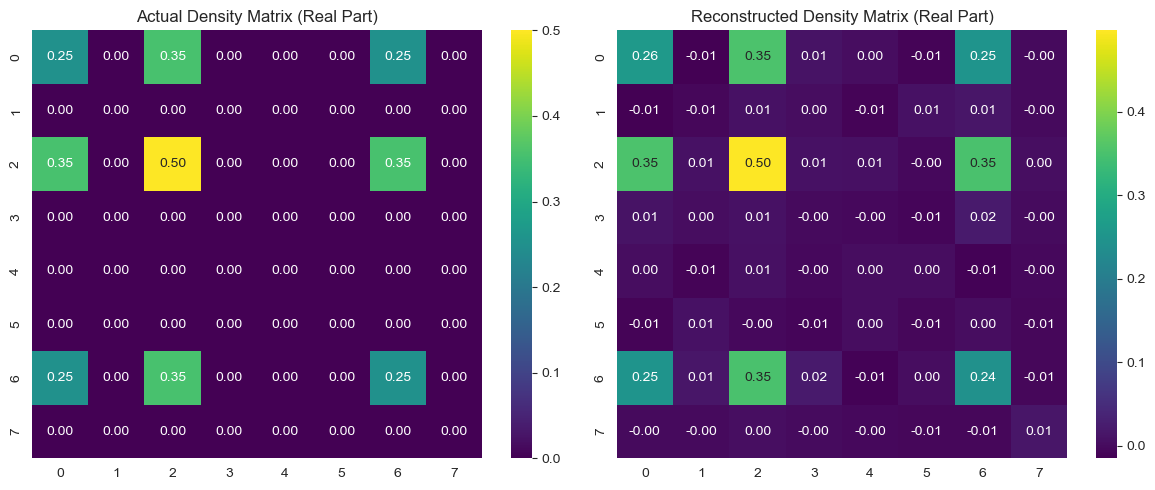

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(np.real(rho_actual), annot=True, fmt=".2f", ax=axes[0], cmap='viridis')
axes[0].set_title('Actual Density Matrix (Real Part)')

sns.heatmap(np.real(rho_reconstructed), annot=True, fmt=".2f", ax=axes[1], cmap='viridis')
axes[1].set_title('Reconstructed Density Matrix (Real Part)')

plt.tight_layout()
plt.show()